In [2]:
import warnings
warnings.filterwarnings("ignore")  # silence warnings
import pandas as pd
from datetime import datetime,date
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import pickle
import matplotlib
matplotlib.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
import sys
sys.path.append("../scripts/")
from utils import label_encoder
from data_cleaning import DataCleaning
cleaner = DataCleaning()

DataCleaning module
Dataset Clearning Module


In [3]:
data  = pd.read_csv('../data/df_merged.csv')
# clean_df = pd.read_csv('../data/clean_merged_df.csv')

In [4]:
df=data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555718 entries, 0 to 1555717
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   order_id              1555718 non-null  int64  
 1   driver_id             1555718 non-null  int64  
 2   driver_action         1555718 non-null  object 
 3   lat                   1555718 non-null  float64
 4   lng                   1555718 non-null  float64
 5   Trip Start Time       1555718 non-null  object 
 6   Trip End Time         1555718 non-null  object 
 7   Date                  1555718 non-null  object 
 8   Year                  1555718 non-null  int64  
 9   Month                 1555718 non-null  int64  
 10  Day                   1555718 non-null  int64  
 11  WeekOfYear            1555718 non-null  int64  
 12  Day of Week           1555718 non-null  int64  
 13  Is Weekend            1555718 non-null  int64  
 14  dayofweek             1555718 non-

In [6]:
# convert "Trip Start Time" and "Trip End Time"  objects into timestamps
df["Trip Start Time"] =pd.to_datetime(df["Trip Start Time"])
df["Trip End Time"] =pd.to_datetime(df["Trip End Time"])

In [7]:
df.dtypes

order_id                         int64
driver_id                        int64
driver_action                   object
lat                            float64
lng                            float64
Trip Start Time         datetime64[ns]
Trip End Time           datetime64[ns]
Date                            object
Year                             int64
Month                            int64
Day                              int64
WeekOfYear                       int64
Day of Week                      int64
Is Weekend                       int64
dayofweek                       object
Duration_Minutes               float64
Trip_Origin_lat                float64
Trip_Origin_lng                float64
Trip_Destination_lat           float64
Trip_Destination_lng           float64
Distance                       float64
dtype: object

In [82]:
# df.columns

In [7]:
df["hour"]=df["Trip Start Time"].apply(lambda x: pd.to_datetime(x).hour)

In [8]:
# check where trip duration is > 10
duration_df=df[df["Duration_Minutes"] >=10]
duration_df["Duration_Minutes"].count()

1476804

In [9]:
# check where trip duration is > 10
duration_df_less_10=df[df["Duration_Minutes"] < 10]
duration_df_less_10["Duration_Minutes"].count()

78914

In [10]:
df["fulfilled"] = ((df["driver_action"] == "accepted") & (df["Duration_Minutes"] >=10)).astype('int64')

In [12]:
df.dtypes

order_id                         int64
driver_id                        int64
driver_action                   object
lat                            float64
lng                            float64
Trip Start Time         datetime64[ns]
Trip End Time           datetime64[ns]
Date                            object
Year                             int64
Month                            int64
Day                              int64
WeekOfYear                       int64
Day of Week                      int64
Is Weekend                       int64
dayofweek                       object
Duration_Minutes               float64
Trip_Origin_lat                float64
Trip_Origin_lng                float64
Trip_Destination_lat           float64
Trip_Destination_lng           float64
Distance                       float64
hour                             int64
fulfilled                        int64
dtype: object

In [59]:
# !  pip install plotly==5.10.0

` Visualizations`

`Plot the origin trip of 500 samples`

In [11]:
df= pd.read_csv('../data/df_merged_clean.csv')

In [81]:
# df.head(1)

In [4]:
df_trip_origin=(df.groupby(['Trip_Origin_lng','Trip_Origin_lat'],as_index=False).agg(Count=('order_id', 'count'))).sort_values(by='Count',ascending=False)


In [5]:
df_trip_origin.reset_index(drop=True).head(1)

,Trip_Origin_lng,Trip_Origin_lat,Count
0,3.368881,6.52744,7080


In [12]:
# ! pip install --upgrade nbformat

In [11]:

fig = px.scatter_mapbox(df_trip_origin.head(100),lat='Trip_Origin_lat',
                lon='Trip_Origin_lng',
                 hover_name="Count",
                 color="Count",
                 height=600,size="Count")

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

`Perform some feature enginnering using geopy library to get the exact location of trip origin and destination`

In [7]:
df_trip_origin_100= df_trip_origin.head(100)

In [8]:
df_trip_origin_100=cleaner.reverse_location(df_trip_origin_100)

In [10]:
df_trip_origin_100.head(1)

,Trip_Origin_lng,Trip_Origin_lat,Count,location
7210,3.368881,6.52744,7080,Shomolu


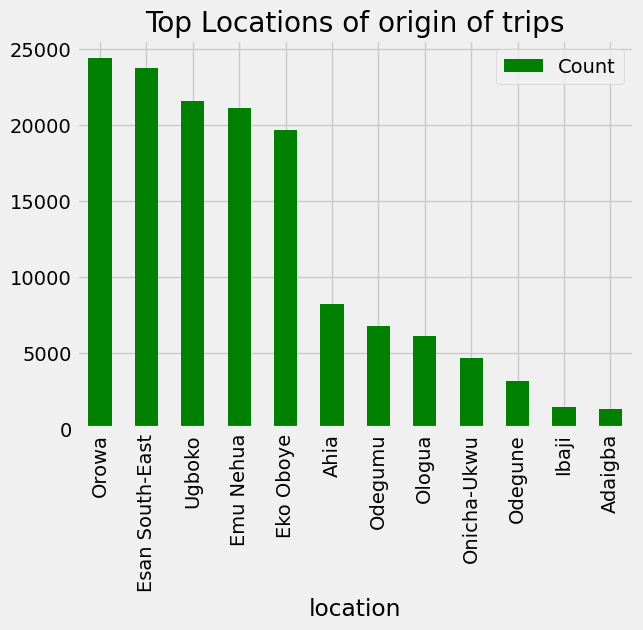

In [91]:
from itertools import cycle, islice

df_trip_origin_100["location"]=df_trip_origin_100['location'].apply(lambda x:x.strip())
df_top_locations=df_trip_origin_100.groupby('location',as_index=False).agg({"Count":"sum"}).sort_values(
                by="Count",ascending=False)

df_top_locations.set_index("location",inplace=True)
# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(['g', 'r', 'b', 'y', 'k']), None, len(df_top_locations)))
# Specify this list of colors as the `color` option to `plot`.
df_top_locations.plot(kind='bar', stacked=True, color=my_colors)
plt.title('Top Locations of origin of trips')
plt.show()


`Plot the destination trips of 500 samples`

In [14]:
df_trip_dest=(df.groupby(['Trip_Destination_lng','Trip_Destination_lat'],as_index=False).agg(Count=('order_id', 'count'))).sort_values(by='Count',ascending=False)

In [13]:
fig = px.scatter_mapbox(df_trip_dest.head(500),lat='Trip_Destination_lat',
                lon='Trip_Destination_lng',
                 hover_name="Count",
                 color="Count",
                 height=600,size="Count")

fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [15]:
df_trip_dest_100= df_trip_dest.head(100)

In [16]:
df_trip_dest_100.head(1)

,Trip_Destination_lng,Trip_Destination_lat,Count
9251,3.377004,6.483093,4168


In [17]:
df_trip_dest_100=cleaner.reverse_location(df_trip_dest_100, lat_col_name='Trip_Destination_lat',
lng_col_name='Trip_Destination_lat')

In [28]:
df_trip_dest_100.head(1)

,Trip_Destination_lng,Trip_Destination_lat,Count,location
9251,3.377004,6.483093,4168,Emu Nehua


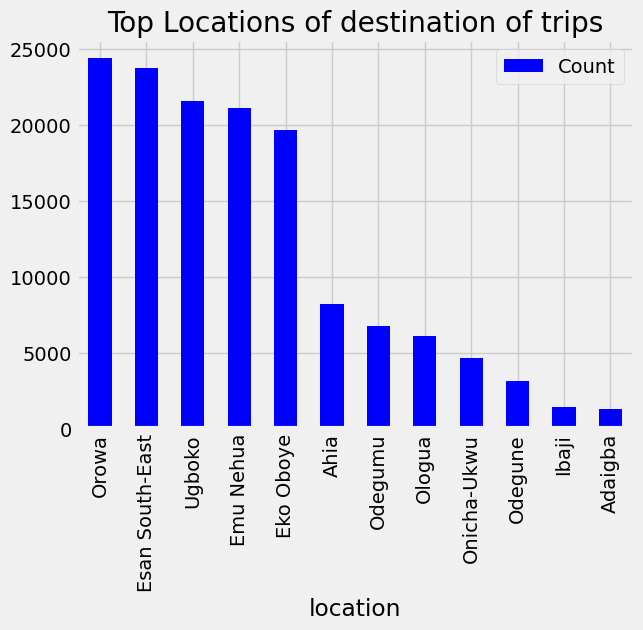

In [92]:
df_trip_dest_100["location"]=df_trip_dest_100['location'].apply(lambda x:x.strip())
df_top_dest_locations=df_trip_dest_100.groupby('location',as_index=False).agg({"Count":"sum"}).sort_values(
                by="Count",ascending=False)

df_top_dest_locations.set_index("location",inplace=True)
# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(['b', 'y', 'r', 'k', 'g']), None, len(df_top_dest_locations)))
# Specify this list of colors as the `color` option to `plot`.
df_top_dest_locations.plot(kind='bar', stacked=True, color=my_colors)
plt.title('Top Locations of destination of trips')
plt.show()

<b>`Holiday`<b>

In [14]:
df_clean = cleaner.add_holiday_feature(df,date_col='Trip Start Time')

`convert holidays into numerics`

In [84]:
df_clean['holiday']=df_clean.holiday.astype('int64')

In [17]:
df_clean.head(1)

,order_id,driver_id,driver_action,lat,lng,Trip Start Time,Trip End Time,Date,Year,Month,...,dayofweek,Duration_Minutes,Trip_Origin_lat,Trip_Origin_lng,Trip_Destination_lat,Trip_Destination_lng,Distance,hour,fulfilled,holiday
0,392001,243828,accepted,6.602207,3.270465,2021-07-01 09:30:59,2021-07-01 09:34:36,2021-07-01 09:34:36,2021,7,...,Thursday,4.0,6.601042,3.276634,6.450107,3.391615,20.984319,9,0,False


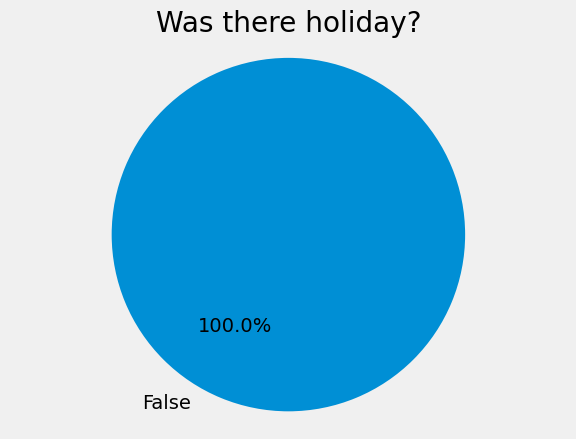

In [20]:

labels= df_clean["holiday"].value_counts().index
sizes= (df_clean["holiday"].value_counts())

plt.pie(sizes,labels=labels,startangle=60, autopct='%1.1f%%')

plt.axis('equal')
plt.title("Was there holiday?")

plt.show()

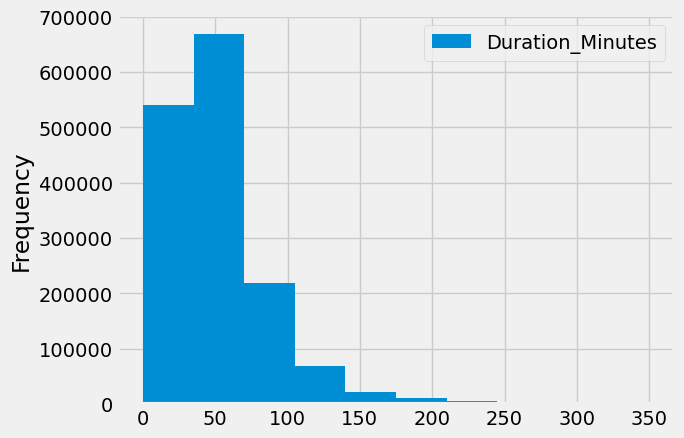

In [21]:
df_clean[["Duration_Minutes"]].plot.hist(bins=10, range=(0,350))
plt.show()

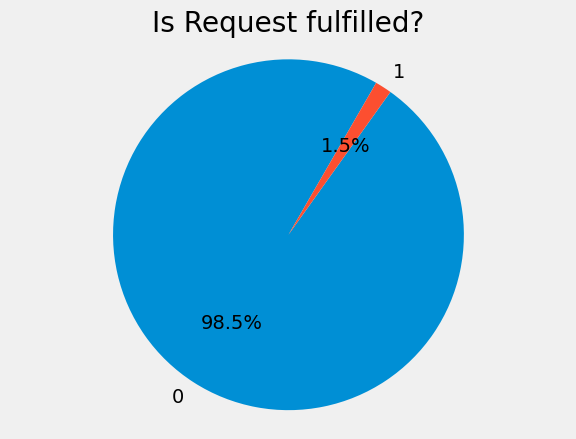

In [22]:
labels= df_clean["fulfilled"].value_counts().index
sizes= ( df_clean["fulfilled"].value_counts())

plt.pie(sizes,labels=labels,startangle=60, autopct='%1.1f%%')

plt.axis('equal')
plt.title("Is Request fulfilled?")

plt.show()

`Weekend as a feature`

In [39]:

df_clean["weekend"]=df_clean["Trip End Time"].apply(
                                lambda x: 4 < pd.to_datetime(x).weekday() < 7)

``There are 98% of unfullfilled order and 1.5% fo fulfilled orders``

In [27]:
df_clean.Distance.describe()

count    1.555718e+06
mean     8.468639e+00
std      6.336811e+00
min      1.638661e-02
25%      4.004319e+00
50%      6.895317e+00
75%      1.128896e+01
max      6.800808e+02
Name: Distance, dtype: float64

In [26]:
accept_500=df_clean[(df_clean["Distance"]<=0.5) & (df_clean["driver_action"]=="accepted")].shape[0]
reject_500=df_clean[(df_clean["Distance"]<=0.5) & (df_clean["driver_action"]=="rejected")].shape[0]

accept_more_500=df_clean[(df_clean["Distance"]>0.5) & (df_clean["driver_action"]=="accepted")].shape[0]
reject_more_500=df_clean[(df_clean["Distance"]>0.5) & (df_clean["driver_action"]=="rejected")].shape[0]

print(f"{accept_500} the number of requests that were accepted by drivers within 500m while {reject_500} were rejected within 500m radius")
print(f"{accept_more_500} the number of requests that were accepted by drivers more than 500m while {reject_more_500} were rejected more than 500m radius")

66 the number of requests that were accepted by drivers within 500m while 3043 were rejected within 500m radius
25805 the number of requests that were accepted by drivers more than 500m while 1526804 were rejected more than 500m radius


In [36]:
acceptance_summary=pd.DataFrame(data=[[accept_500,reject_500],[accept_more_500,reject_more_500]],
                columns=["Accepted","Rejected"],index=["With in 500m","More than 500m"])

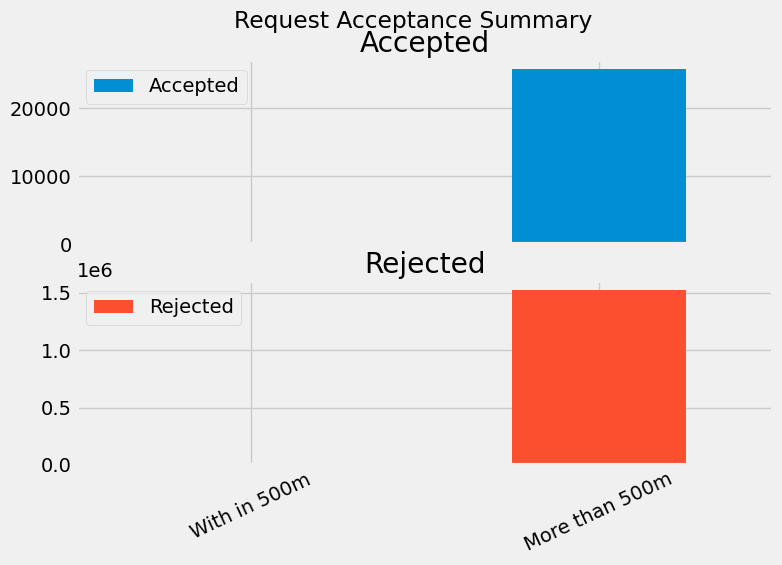

In [37]:
acceptance_summary.plot(kind='bar',subplots=True,rot=25,figsize=(8,5))
plt.suptitle("Request Acceptance Summary")
plt.show()

In [40]:
df_clean.groupby(["driver_action","weekend"],as_index=False).size()

,driver_action,weekend,size
0,accepted,False,22103
1,accepted,True,3768
2,rejected,False,1331448
3,rejected,True,198399


`visualize driver actions given it is a weekend day`

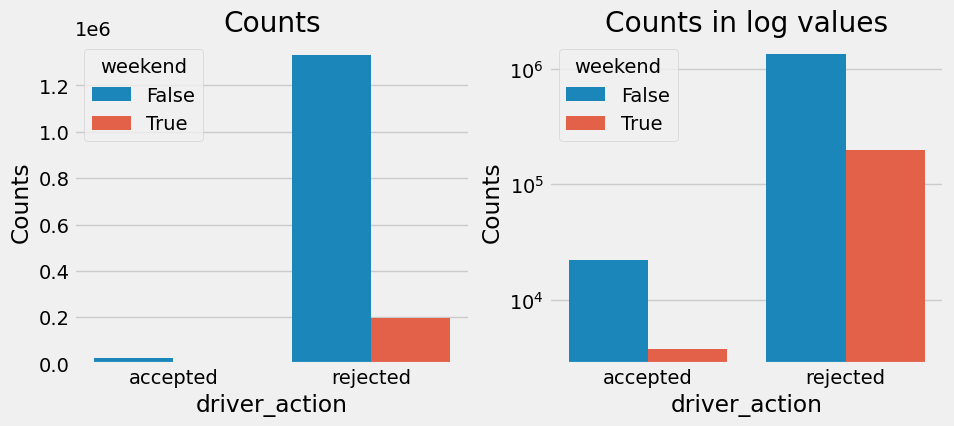

In [42]:

import seaborn as sns
fig,ax=plt.subplots(1,2,figsize=(10,4))

data=df_clean.groupby(["driver_action","weekend"],as_index=False).size()

plt.subplot(1,2,1,title="Counts")
sns.barplot( x="driver_action", y="size", hue = 'weekend', data = data)
plt.ylabel("Counts")

plt.subplot(1,2,2,title="Counts in log values")
sns.barplot( x="driver_action", y="size", hue = 'weekend', data = data,log=True)
plt.ylabel("Counts")

plt.show()

In [43]:
# save a clean dataset
df_clean.to_csv('../data/df_clean_final.csv',index=False)

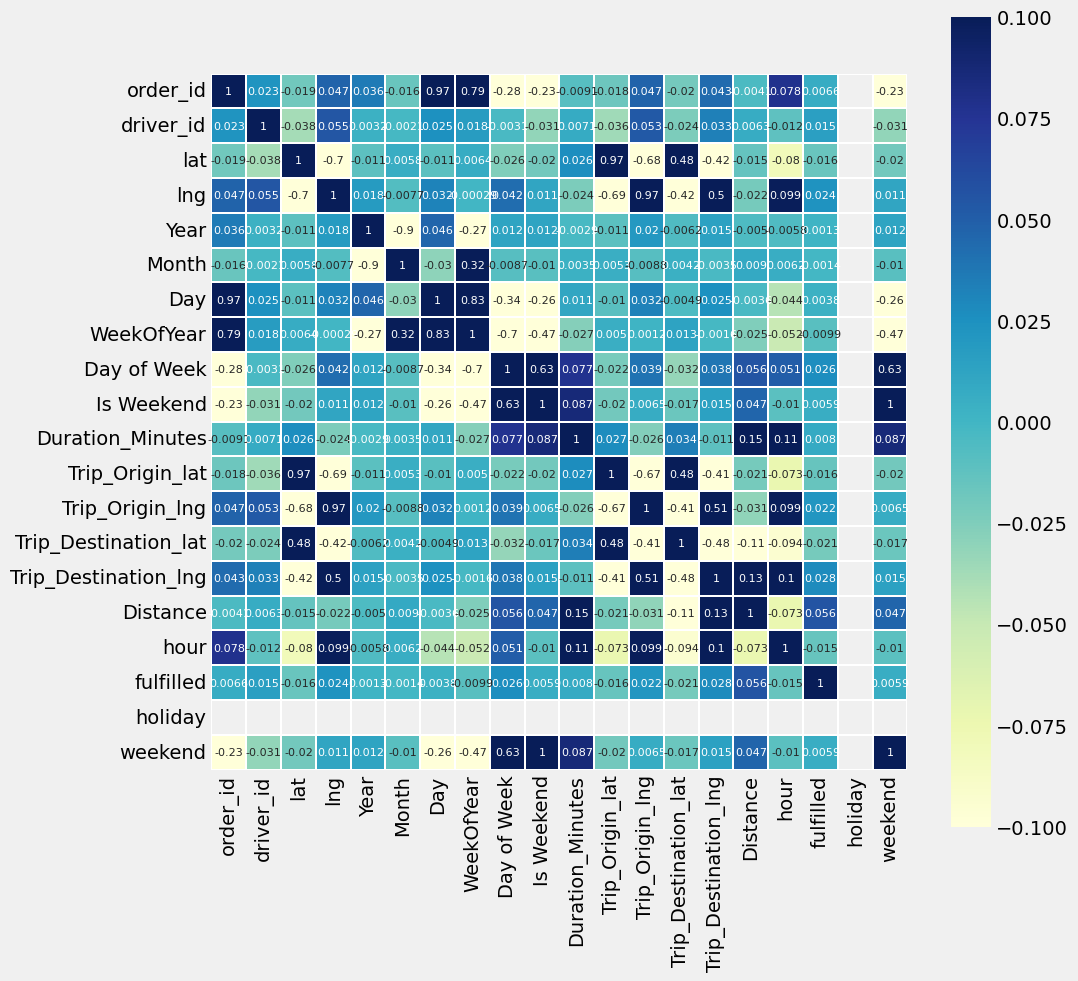

In [12]:
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10, 10))

df_clean=pd.read_csv('../data/df_clean_final.csv')
corr_df =df_clean.corr()
sns.heatmap(corr_df, vmin=corr_df.values.min(), vmax=1, square=True, cmap="YlGnBu",
 linewidths=0.1, annot=True, annot_kws={"fontsize":8})
plt.show()